<a href="https://colab.research.google.com/github/Abhishek-jakhar/Machine_learning/blob/main/Random_forest_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
X,y = make_classification(n_samples=100,n_features=5,n_redundant=0,n_informative=5,n_clusters_per_class=1)

In [3]:
X.shape

(100, 5)

In [4]:
y.shape

(100,)

In [5]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y


In [6]:
df.head()

,col1,col2,col3,col4,col5,target
0,-2.973186,0.323213,-0.390482,-0.277964,-1.120004,1
1,1.972446,-1.820914,0.325198,-1.030909,-0.096279,0
2,-1.642314,0.581686,0.573758,-1.106895,-1.041421,1
3,0.090680,1.259129,2.711697,-1.223763,-1.536053,1
4,-0.340160,-1.420236,2.127164,1.592983,1.204560,0


1. Function for row sampling

In [7]:
def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [8]:
int(20*df.shape[0])

2000

In [9]:
df.shape

(100, 6)

2. Column selection or sampling

In [10]:
import random
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [11]:
sample_features(df,0.5)

/tmp/ipython-input-3161237612.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


,col3,col5,target
0,-0.390482,-1.120004,1
1,0.325198,-0.096279,0
2,0.573758,-1.041421,1
3,2.711697,-1.536053,1
4,2.127164,1.204560,0
...,...,...,...
95,0.072339,-1.167971,1
96,1.681629,1.223557,0
97,1.998863,-0.954578,1
98,1.859992,-1.339441,1


In [12]:
def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [13]:
combined_sampling(df,0.5,0.5)

/tmp/ipython-input-3161237612.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


,col1,col2,target
72,0.151745,2.833293,1
14,0.808781,3.242610,1
57,2.465346,-0.504370,0
66,3.271108,-1.840014,0
64,0.239859,-1.477145,0
90,-3.716400,1.249773,1
43,-1.432662,1.487086,1
72,0.151745,2.833293,1
20,0.512459,-0.816937,0
6,-1.986134,0.329720,1


In [14]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [15]:
df1 = combined_sampling(df,0.5,0.5)

/tmp/ipython-input-3161237612.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [16]:
df1

,col4,col3,target
74,0.552853,2.054626,0
39,1.543048,0.580595,1
47,0.180147,0.902693,1
49,3.185120,0.122837,0
84,2.364844,-0.038271,0
95,-2.124156,0.072339,1
6,-1.872338,0.165528,1
83,0.154501,1.207306,0
93,-0.118040,0.601630,1
96,1.343038,1.681629,0


In [17]:
df2 = combined_sampling(df,0.5,0.5)

/tmp/ipython-input-3161237612.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [18]:
df2

,col4,col2,target
6,-1.872338,0.329720,1
87,0.267141,-0.075902,0
75,2.721448,-2.648473,0
76,-1.724635,-0.719160,1
60,-1.077940,1.274884,1
62,-2.237157,-1.034073,0
39,1.543048,-1.010894,1
26,1.682635,2.684828,1
10,2.118336,3.215001,1
79,0.283981,2.929114,1


In [19]:
df3 = combined_sampling(df,0.5,0.5)

/tmp/ipython-input-3161237612.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [20]:
df3

,col3,col4,target
63,0.344024,2.228253,0
1,0.325198,-1.030909,0
71,-0.334712,-0.082426,0
29,1.809720,-2.107663,0
72,0.348577,0.238369,1
89,1.330723,1.460226,0
77,0.559386,-0.519974,1
66,-1.307950,-1.284800,0
18,1.338317,-0.590753,0
14,2.915350,1.518662,1


In [21]:
clf1.fit(df1.iloc[:,:2],df3.iloc[:,-1])
clf2.fit(df2.iloc[:,:2],df3.iloc[:,-1])
clf3.fit(df3.iloc[:,:2],df3.iloc[:,-1])


DecisionTreeClassifier()

In [22]:
df1.shape

(50, 3)

In [23]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col4', 'col3', 'target'], dtype='object')
Index(['col4', 'col2', 'target'], dtype='object')
Index(['col3', 'col4', 'target'], dtype='object')


In [24]:
from sklearn.tree import plot_tree


[Text(0.29347826086956524, 0.9375, 'x[1] <= 0.002\ngini = 0.499\nsamples = 50\nvalue = [26, 24]'),
 Text(0.13043478260869565, 0.8125, 'x[1] <= -1.432\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.21195652173913043, 0.875, 'True  '),
 Text(0.08695652173913043, 0.6875, 'x[1] <= -2.346\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.043478260869565216, 0.5625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.13043478260869565, 0.5625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.17391304347826086, 0.6875, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.45652173913043476, 0.8125, 'x[0] <= -0.537\ngini = 0.476\nsamples = 41\nvalue = [25, 16]'),
 Text(0.375, 0.875, '  False'),
 Text(0.2608695652173913, 0.6875, 'x[0] <= -0.885\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(0.21739130434782608, 0.5625, 'x[0] <= -2.14\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.17391304347826086, 0.4375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.260869565217391

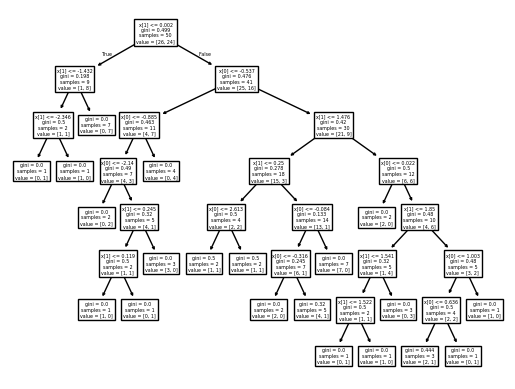

In [25]:
plot_tree(clf1)

[Text(0.21022727272727273, 0.9583333333333334, 'x[0] <= -3.511\ngini = 0.499\nsamples = 50\nvalue = [26, 24]'),
 Text(0.16477272727272727, 0.875, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.1875, 0.9166666666666667, 'True  '),
 Text(0.2556818181818182, 0.875, 'x[0] <= -2.318\ngini = 0.5\nsamples = 48\nvalue = [24, 24]'),
 Text(0.23295454545454547, 0.9166666666666667, '  False'),
 Text(0.21022727272727273, 0.7916666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.30113636363636365, 0.7916666666666666, 'x[0] <= -1.358\ngini = 0.498\nsamples = 45\nvalue = [24, 21]'),
 Text(0.09090909090909091, 0.7083333333333334, 'x[1] <= 0.501\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.045454545454545456, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.13636363636363635, 0.625, 'x[0] <= -1.81\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.09090909090909091, 0.5416666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.18181818181818182, 0.5416666

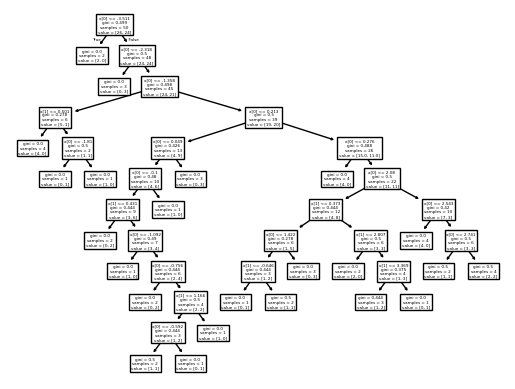

In [26]:
plot_tree(clf2)


[Text(0.34210526315789475, 0.9375, 'x[1] <= -1.05\ngini = 0.499\nsamples = 50\nvalue = [26, 24]'),
 Text(0.10526315789473684, 0.8125, 'x[0] <= -0.805\ngini = 0.391\nsamples = 15\nvalue = [4, 11]'),
 Text(0.2236842105263158, 0.875, 'True  '),
 Text(0.05263157894736842, 0.6875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.15789473684210525, 0.6875, 'x[0] <= 1.169\ngini = 0.337\nsamples = 14\nvalue = [3, 11]'),
 Text(0.10526315789473684, 0.5625, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.21052631578947367, 0.5625, 'x[0] <= 1.904\ngini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.15789473684210525, 0.4375, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.2631578947368421, 0.4375, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.5789473684210527, 0.8125, 'x[0] <= -0.363\ngini = 0.467\nsamples = 35\nvalue = [22, 13]'),
 Text(0.4605263157894737, 0.875, '  False'),
 Text(0.47368421052631576, 0.6875, 'x[1] <= 1.269\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.4

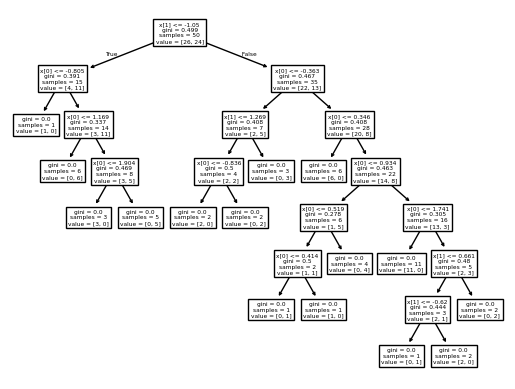

In [27]:
plot_tree(clf3)

In [28]:
opt1 = clf1.predict(np.array([1.736881,	-0.552376]).reshape(1,2))
opt1

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [29]:
clf2.predict(np.array([1.736881,	-0.552376]).reshape(1,2))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [30]:
clf3.predict(np.array([1.736881,	-0.552376]).reshape(1,2))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])